In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymongo
%matplotlib inline

In [2]:
from config import settings
db = pymongo.MongoClient("mongodb://localhost:27017/")[settings.collection_name]

In [3]:
confs = []
for i in db['FP_conf'].find({}):
    confs = confs + i['confidences']
for i in db['FN_conf'].find({}):
    confs = confs + i['confidences']

/data2/kuntai/envs/dds/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

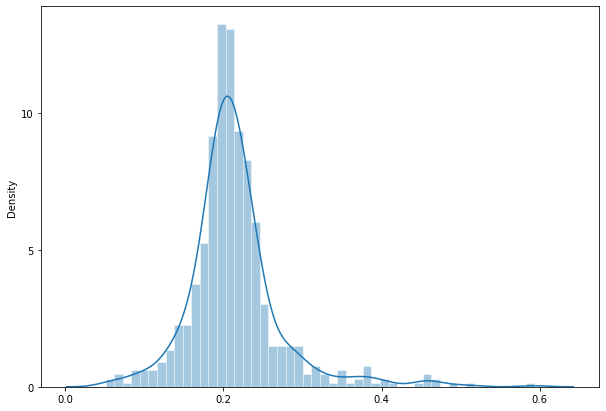

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=3)
sns.distplot(confs, ax=ax)

In [9]:
import numpy as np
print(np.array(confs).mean())
print(np.array(confs).std())

0.21006889457876785
0.042745390647258276


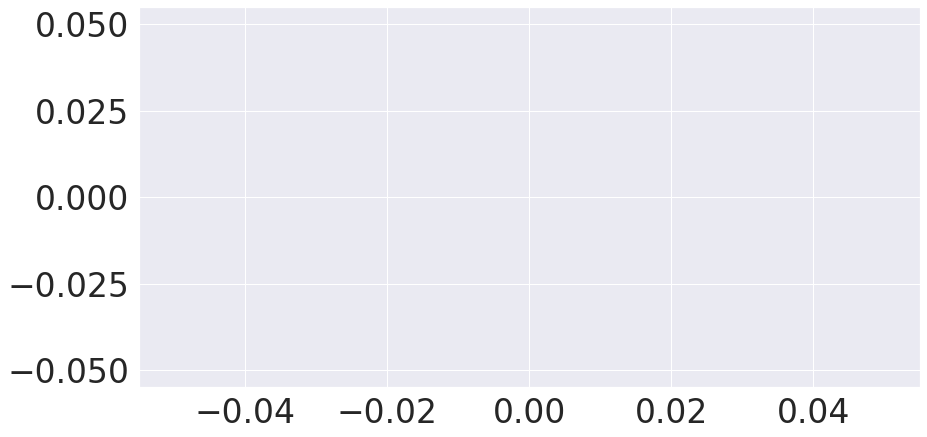

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))
hidden_fns = list(db['Hidden_FP'].find())
hidden_fns = [i['count'] for i in hidden_fns]
ax.plot(hidden_fns)